# UJIIndoorLoc Dataset Explorer

This notebook provides an interactive way to explore the Wi-Fi fingerprinting dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better table visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. Load Training Data

In [2]:
train_df = pd.read_csv('UJIndoorLoc/trainingData.csv')
print(f"Training Data Shape: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
train_df.head()

Training Data Shape: 19937 rows × 529 columns


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100

## 2. Training Data - Metadata Columns

View the location and device information (excluding WAP signals for readability)

In [3]:
# Display only metadata columns (last 9 columns)
metadata_cols = ['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 
                 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']

train_df[metadata_cols].head(20)

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


## 3. Training Data - WAP Signal Sample

View signal strength from first 20 WAPs for first 10 samples

In [4]:
# Show first 20 WAP columns
train_df.iloc[:10, :20]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
6,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
7,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
8,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
9,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


## 4. Training Data - Basic Statistics

In [5]:
# Basic info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [6]:
# Statistical summary of metadata columns
train_df[metadata_cols].describe()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## 5. Training Data - Location Distribution

In [8]:
# Create Building-Floor combination
train_df['Location'] = train_df['BUILDINGID'].astype(str) + '-' + train_df['FLOOR'].astype(str)

# Count samples per location
location_counts = train_df['Location'].value_counts().sort_index()

# Display as DataFrame
location_df = pd.DataFrame({
    'Location (Building-Floor)': location_counts.index,
    'Number of Samples': location_counts.values,
    'Percentage': (location_counts.to_numpy(dtype=float) / float(location_counts.sum()) * 100).round(2)
})

location_df

,Location (Building-Floor),Number of Samples,Percentage
0,0-0,1059,5.31
1,0-1,1356,6.80
2,0-2,1443,7.24
3,0-3,1391,6.98
4,1-0,1368,6.86
5,1-1,1484,7.44
6,1-2,1396,7.00
7,1-3,948,4.75
8,2-0,1942,9.74
9,2-1,2162,10.84


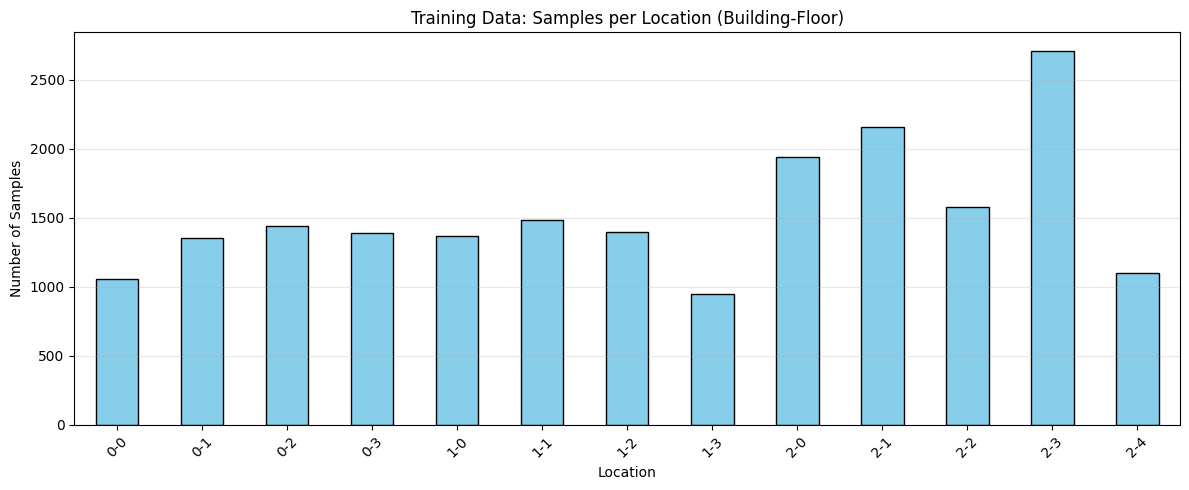

In [9]:
# Visualize distribution
plt.figure(figsize=(12, 5))
location_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Training Data: Samples per Location (Building-Floor)')
plt.xlabel('Location')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Load Validation Data

In [10]:
val_df = pd.read_csv('UJIndoorLoc/validationData.csv')
print(f"Validation Data Shape: {val_df.shape[0]} rows × {val_df.shape[1]} columns")
val_df.head()

Validation Data Shape: 1111 rows × 529 columns


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100

## 7. Validation Data - Metadata Columns

In [11]:
val_df[metadata_cols].head(20)

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


## 8. Validation Data - Location Distribution

In [12]:
# Create Building-Floor combination
val_df['Location'] = val_df['BUILDINGID'].astype(str) + '-' + val_df['FLOOR'].astype(str)

# Count samples per location
val_location_counts = val_df['Location'].value_counts().sort_index()

# Display as DataFrame
val_location_df = pd.DataFrame({
    'Location (Building-Floor)': val_location_counts.index,
    'Number of Samples': val_location_counts.values,
    'Percentage': (val_location_counts.to_numpy(dtype=float) / float(val_location_counts.sum()) * 100).round(2)
})

val_location_df

,Location (Building-Floor),Number of Samples,Percentage
0,0-0,78,7.02
1,0-1,208,18.72
2,0-2,165,14.85
3,0-3,85,7.65
4,1-0,30,2.70
5,1-1,143,12.87
6,1-2,87,7.83
7,1-3,47,4.23
8,2-0,24,2.16
9,2-1,111,9.99


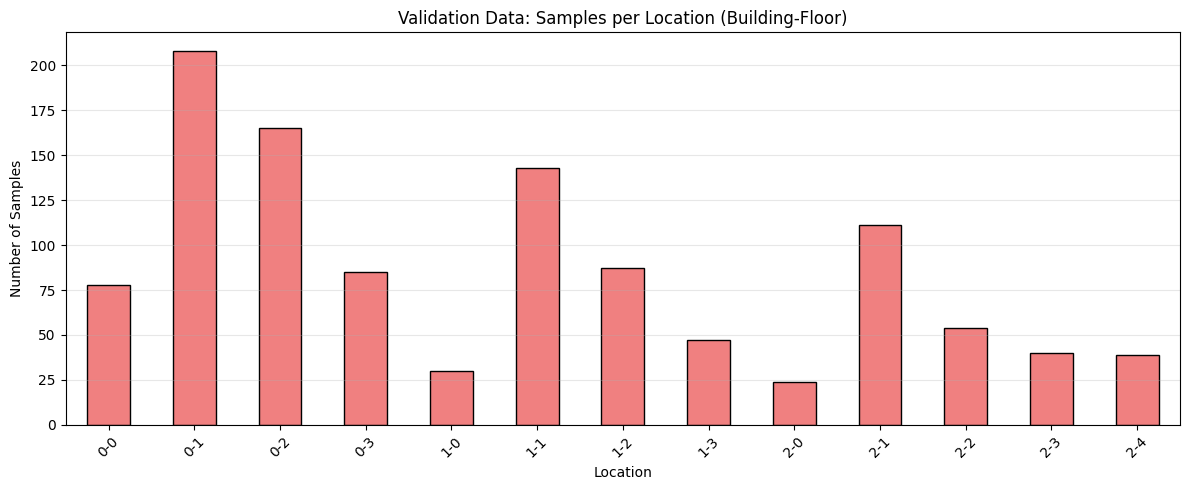

In [13]:
# Visualize distribution
plt.figure(figsize=(12, 5))
val_location_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Validation Data: Samples per Location (Building-Floor)')
plt.xlabel('Location')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Combined Statistics

In [14]:
# Create comparison table
comparison = pd.DataFrame({
    'Metric': ['Total Samples', 'Unique Locations', 'Buildings', 'Floors', 'Unique Users', 'Unique Phones'],
    'Training Data': [
        len(train_df),
        train_df['Location'].nunique(),
        train_df['BUILDINGID'].nunique(),
        train_df['FLOOR'].nunique(),
        train_df['USERID'].nunique(),
        train_df['PHONEID'].nunique()
    ],
    'Validation Data': [
        len(val_df),
        val_df['Location'].nunique(),
        val_df['BUILDINGID'].nunique(),
        val_df['FLOOR'].nunique(),
        val_df['USERID'].nunique(),
        val_df['PHONEID'].nunique()
    ]
})

comparison

,Metric,Training Data,Validation Data
0,Total Samples,19937,1111
1,Unique Locations,13,13
2,Buildings,3,3
3,Floors,5,5
4,Unique Users,18,1
5,Unique Phones,16,11


## 10. WAP Signal Analysis

In [15]:
# WAP columns (first 520)
wap_cols = train_df.columns[:520]

# Statistics about WAP signals
wap_stats = pd.DataFrame({
    'Metric': ['Total WAPs', 'Min Signal Value', 'Max Signal Value', 'Mean Signal', 'Median Signal'],
    'Training Data': [
        520,
        train_df[wap_cols].values.min(),
        train_df[wap_cols].values.max(),
        train_df[wap_cols].values.mean().round(2),
        np.median(train_df[wap_cols].values)
    ],
    'Validation Data': [
        520,
        val_df[wap_cols].values.min(),
        val_df[wap_cols].values.max(),
        val_df[wap_cols].values.mean().round(2),
        np.median(val_df[wap_cols].values)
    ]
})

wap_stats

,Metric,Training Data,Validation Data
0,Total WAPs,520.00,520.00
1,Min Signal Value,-104.00,-102.00
2,Max Signal Value,100.00,100.00
3,Mean Signal,93.82,94.37
4,Median Signal,100.00,100.00


In [16]:
# Check how many WAPs detected per sample (non-100 values)
train_active_waps = (train_df[wap_cols] != 100).sum(axis=1)
val_active_waps = (val_df[wap_cols] != 100).sum(axis=1)

# Create summary
active_wap_stats = pd.DataFrame({
    'Metric': ['Mean Active WAPs', 'Median Active WAPs', 'Min Active WAPs', 'Max Active WAPs'],
    'Training Data': [
        train_active_waps.mean(),
        train_active_waps.median(),
        train_active_waps.min(),
        train_active_waps.max()
    ],
    'Validation Data': [
        val_active_waps.mean(),
        val_active_waps.median(),
        val_active_waps.min(),
        val_active_waps.max()
    ]
})

active_wap_stats

,Metric,Training Data,Validation Data
0,Mean Active WAPs,17.994834,16.475248
1,Median Active WAPs,17.000000,15.000000
2,Min Active WAPs,0.000000,1.000000
3,Max Active WAPs,51.000000,35.000000


## 11. Explore Specific Sample

Change the `sample_idx` to view different samples

In [17]:
# Choose a sample to inspect
sample_idx = 0

# Get the sample
sample = train_df.iloc[sample_idx]

# Display metadata
print(f"Sample #{sample_idx} Metadata:")
sample[metadata_cols].to_frame().T

Sample #0 Metadata:


,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4864920.7782,2,1,106,2,2,23,1371713733


In [18]:
# Get active WAPs (signal != 100)
sample_waps = sample[wap_cols]
active_signals = sample_waps[sample_waps != 100].sort_values(ascending=False)

print(f"Active WAPs detected: {len(active_signals)} out of 520")
print(f"\nTop 20 Strongest Signals:")

# Display as DataFrame
pd.DataFrame({
    'WAP Name': active_signals.head(20).index,
    'Signal Strength (dBm)': active_signals.head(20).values
})

Active WAPs detected: 17 out of 520

Top 20 Strongest Signals:


,WAP Name,Signal Strength (dBm)
0,WAP173,-53
1,WAP172,-54
2,WAP090,-67
3,WAP103,-68
4,WAP104,-68
5,WAP091,-68
6,WAP105,-78
7,WAP106,-79
8,WAP169,-81
9,WAP192,-81
